In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [6]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 37 of Set 4 : coquimbo
Processing Record 38 of Set 4 : songkhla
Processing Record 39 of Set 4 : provideniya
Processing Record 40 of Set 4 : henties bay
Processing Record 41 of Set 4 : rikitea
Processing Record 42 of Set 4 : mionica
Processing Record 43 of Set 4 : pisco
Processing Record 44 of Set 4 : flinders
Processing Record 45 of Set 4 : cherskiy
Processing Record 46 of Set 4 : port alfred
Processing Record 47 of Set 4 : atuona
Processing Record 48 of Set 4 : bredasdorp
Processing Record 49 of Set 4 : mataura
Processing Record 50 of Set 4 : new norfolk
Processing Record 0 of Set 5 : iqaluit
Processing Record 1 of Set 5 : hilo
Processing Record 2 of Set 5 : port elizabeth
Processing Record 3 of Set 5 : sioux lookout
Processing Record 4 of Set 5 : bethel
Processing Record 5 of Set 5 : hobart
City not found. Skipping...
Processing Record 6 of Set 5 : urengoy
Processing Record 7 of Set 5 : sonepur
Processing Recor

Processing Record 25 of Set 8 : lufilufi
Processing Record 26 of Set 8 : norman wells
Processing Record 27 of Set 8 : yaan
Processing Record 28 of Set 8 : krasnoarmeysk
Processing Record 29 of Set 8 : egvekinot
Processing Record 30 of Set 8 : granja
Processing Record 31 of Set 8 : carutapera
Processing Record 32 of Set 8 : novoanninskiy
Processing Record 33 of Set 8 : arlit
Processing Record 34 of Set 8 : portland
Processing Record 35 of Set 8 : la ronge
Processing Record 36 of Set 8 : clinton
Processing Record 37 of Set 8 : chuy
Processing Record 38 of Set 8 : saint-philippe
Processing Record 39 of Set 8 : vaini
City not found. Skipping...
Processing Record 40 of Set 8 : harrison
Processing Record 41 of Set 8 : afua
Processing Record 42 of Set 8 : kattivakkam
Processing Record 43 of Set 8 : rio das pedras
Processing Record 44 of Set 8 : tangjiazhuang
City not found. Skipping...
Processing Record 45 of Set 8 : goma
City not found. Skipping...
Processing Record 46 of Set 8 : barrow
Proc

Processing Record 6 of Set 12 : sao filipe
Processing Record 7 of Set 12 : sciacca
Processing Record 8 of Set 12 : salym
Processing Record 9 of Set 12 : szihalom
Processing Record 10 of Set 12 : kwinana
Processing Record 11 of Set 12 : lagoa
Processing Record 12 of Set 12 : nouadhibou
Processing Record 13 of Set 12 : belluru
Processing Record 14 of Set 12 : cap-aux-meules
Processing Record 15 of Set 12 : mariestad
Processing Record 16 of Set 12 : banda aceh
Processing Record 17 of Set 12 : southbridge
Processing Record 18 of Set 12 : westlock
Processing Record 19 of Set 12 : batesville
Processing Record 20 of Set 12 : camacha
City not found. Skipping...
Processing Record 21 of Set 12 : traverse city
Processing Record 22 of Set 12 : tsiroanomandidy
Processing Record 23 of Set 12 : aksu
Processing Record 24 of Set 12 : karakol
Processing Record 25 of Set 12 : qiongshan
Processing Record 26 of Set 12 : ampanihy
Processing Record 27 of Set 12 : san cristobal
Processing Record 28 of Set 12 

In [7]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_dict.count()

City          738
Cloudiness    738
Country       738
Date          738
Humidity      738
Lat           738
Lng           738
Max Temp      738
Wind Speed    738
dtype: int64

In [8]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coquimbo,90,CL,1593470829,93,-29.95,-71.34,55.40,8.05
1,Songkhla,75,TH,1593471168,100,6.83,100.67,73.40,2.24
2,Provideniya,40,RU,1593470989,70,64.38,-173.30,44.60,15.66
3,Henties Bay,0,NA,1593471168,86,-22.12,14.28,55.99,1.99
4,Rikitea,38,PF,1593471102,60,-23.12,-134.97,68.27,14.12
...,...,...,...,...,...,...,...,...,...
733,Zapolyarnyy,100,RU,1593471267,80,69.42,30.81,41.00,26.40
734,Itarema,39,BR,1593471013,82,-2.92,-39.92,78.01,10.89
735,Ruyigi Province,71,BI,1593471267,63,-3.45,30.32,60.44,3.04
736,Chapais,40,CA,1593471267,53,49.78,-74.85,77.00,8.05


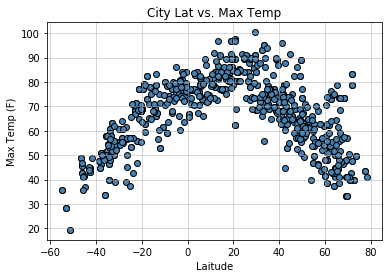

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Lat vs. Max Temp")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temp (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


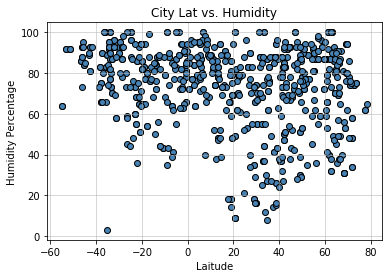

In [20]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Lat vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity Percentage")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


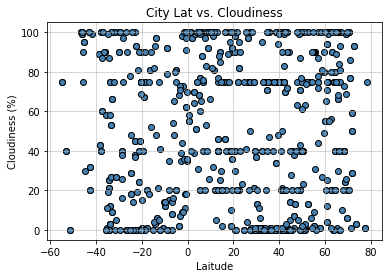

In [18]:

# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Lat vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


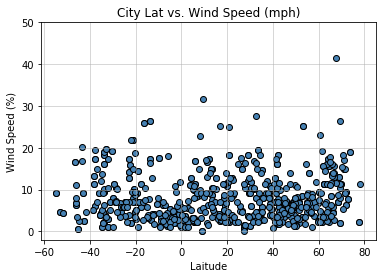

In [19]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Lat vs. Wind Speed (mph)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)